## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# To determine what it takes to start a Movie shop, Microsoft company

### introduction

Movie shop bussiness is increasingly becoming a profitable venture to start. Many people prefer to entertain themselves through watching movies and television series. Microsft has seen this as an advantage to venture into the bussiness.
The head of Microsoft task us to do the analysis on what it takes to have a succesful bussiness.

### problem Statement

Microsoft sees all big companies creating original video content and they want to get in on the fun. They decided to create a new studio. They want to know what type of films are currently doing best at the box office. 
The head of Microsoft wants us to to translate those findings into actionable insight that he can use to decide what type of films to create.

### objectives

we want to investigate what a successful movie shop requires. To do that we need to fulfill the following objectives;

1. What are the Budget Mcrosoft has to allocate
2. The Genre that are performing good at the box office currently.
3. How long do or should a movie run
4. What time do Movies has to be released to satisfy the cunsumers need

## Method used
### data 

This project we will use a folder 'ZippedData' which has movie datasets from;
. Box Office Mojo
. IMBD
. Rotten Tomatoes
. TheMovieDB
. The Numbers

The Method thats we will use to reach our objective will be ;
1. Importation of necessary libraries for the analysis.
2. Creating the DataFrame for all the the datasets
3. Understanding(which data can mostly meet our objectives) and  Cleaning the Data.
4. Dealing with Misssing Values.
5. Joining the datasets choosed.

After deciding on what dataset to use will have to translate these findings and draw conclusion regarding our findings and future work. These can be achieved by ;
1. Creating VIsualization(use statistical and descriptive analysis).
2. Drawing Conclusions.
3. Providing Recomendations on how to start.
4. summary of our findings and future work.

### importation of libraries and Data preparation

In [2]:
#libraries for importation of data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv



In [3]:
import sqlite3 
import requests
from bs4 import BeautifulSoup

In [4]:
#getting into the folder 
! ls

CONTRIBUTING.md
LICENSE.md
README.md
awesome.gif
im.db
movie_data_erd.jpeg
student.ipynb
tmdb.movies.csv
zippedData


In [5]:
cd zippedData

C:\Users\DavidKamiti\OneDrive\Documents\GitHub\dsc-phase-1-project-v2-4\zippedData


In [6]:
! ls

New WinRAR archive.rar
bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [7]:
cd zippedData

[WinError 2] The system cannot find the file specified: 'zippedData'
C:\Users\DavidKamiti\OneDrive\Documents\GitHub\dsc-phase-1-project-v2-4\zippedData


In [8]:
! ls

New WinRAR archive.rar
bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


constructing DataFrames for all the data in ZippedData. Then decide which data to use for the analysis.

In [9]:
# getting the data frame for tmdb.movies
pd.read_csv('../tmdb.movies.csv').head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [131]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [130]:
#Movie_ratings DataFrame
movie_ratings_df = pd.read_sql_query("""
SELECT *
FROM movie_ratings
LIMIT 10
;""", conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [12]:
#openning the bom.movie_gross.csv.gz in a DataFrame
pd.read_csv('bom.movie_gross.csv.gz').head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
#opening tn.movie_budgets.csv.gz for first five rows.
pd.read_csv('tn.movie_budgets.csv.gz').head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# tndb.movies.csv.gz, first 5 rows
pd.read_csv('tmdb.movies.csv.gz').head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### 2. Data cleaning
 
 'tn_movie_bugdets'

In [15]:
# setting tn_movie_budgets as tn for easier analysis
tn = pd.read_csv('tn.movie_budgets.csv.gz')
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
#finding the information about the DataFrame
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the information gotten we can see that all the columns are objects except the "id" columns which is integer. There are no missing data as all colunms(5782) have all entries. The release date that have Dtype as object was changed to Datetime for easier working, Also the 'production_budget', 'domestic_gross' and Worldwide_gross that are objects we changed to numeric. Then we checked for duplicates. 

In [17]:
#looking for duplicates
tn.duplicated().any()

False

In [18]:
#remove id column
tn = tn.drop('id', axis = 1)
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
#convert Dtype from object to Datetime
tn['release_date'] = pd.to_datetime(tn['release_date'])



In [20]:
tn['release_year'] = pd.DatetimeIndex(tn['release_date']).year

In [ ]:
#define functions to clean numbers
def numclean(df,col):
    '''
    dk = pandas DataFrame
    kd = Column
    Remove $ symbol, removes ',' separator and changes to int type
    Returns DataFrame
    '''
    df[col]=df.astype('int')
    return df

In [21]:
#removing the commas in the columns
tn = tn.replace(',','', regex=True)
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,$425000000,$760507625,$2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,$410600000,$241063875,$1045663875,2011
2,2019-06-07,Dark Phoenix,$350000000,$42762350,$149762350,2019
3,2015-05-01,Avengers: Age of Ultron,$330600000,$459005868,$1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,$317000000,$620181382,$1316721747,2017


In [22]:
tn['production_budget'] = tn['production_budget'].str.replace('$','',regex=True,)
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,$760507625,$2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,$241063875,$1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,$42762350,$149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,$459005868,$1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,$620181382,$1316721747,2017


In [23]:
tn['domestic_gross'] = tn['domestic_gross'].str.replace('$','',regex=True)
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,$2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,$1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,$149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,$1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,$1316721747,2017


In [24]:
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace('$','',regex=True)
tn.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [25]:
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


Converting the datatypes of the columns from object to integer. Then find the anomalise in the data using the 'desribe' method.

In [26]:
tn = tn.astype({'production_budget':'int'})


In [27]:
tn = tn.astype({'domestic_gross': 'int'})

print(tn.dtypes)

release_date         datetime64[ns]
movie                        object
production_budget             int32
domestic_gross                int32
worldwide_gross              object
release_year                  int64
dtype: object


In [30]:
tn = tn.astype({'worldwide_gross':'int'})


In [31]:
tn.describe()

,production_budget,domestic_gross,worldwide_gross,release_year
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,8.988256e+07,2003.967139
std,4.181208e+07,6.824060e+07,1.738874e+08,12.724386
min,1.100000e+03,0.000000e+00,-2.147484e+09,1915.000000
25%,5.000000e+06,1.429534e+06,4.102274e+06,2000.000000
50%,1.700000e+07,1.722594e+07,2.794748e+07,2007.000000
75%,4.000000e+07,5.234866e+07,9.758278e+07,2012.000000
max,4.250000e+08,9.366622e+08,2.053311e+09,2020.000000


In [32]:
#investigate rows whereworldwide_gross is 0
tn[tn['worldwide_gross'] == 0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,2020-12-31,Moonfall,150000000,0,0,2020
479,2017-12-13,Bright,90000000,0,0,2017
480,2019-12-31,Army of the Dead,90000000,0,0,2019
535,2020-02-21,Call of the Wild,82000000,0,0,2020
670,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0,0,2014
5764,2007-12-31,Tin Can Man,12000,0,0,2007
5771,2015-05-19,Family Motocross,10000,0,0,2015
5777,2018-12-31,Red 11,7000,0,0,2018


In [33]:
#showing rows where worldwide_gross is 0
tn[tn['worldwide_gross'] == 0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,2020-12-31,Moonfall,150000000,0,0,2020
479,2017-12-13,Bright,90000000,0,0,2017
480,2019-12-31,Army of the Dead,90000000,0,0,2019
535,2020-02-21,Call of the Wild,82000000,0,0,2020
670,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0,0,2014
5764,2007-12-31,Tin Can Man,12000,0,0,2007
5771,2015-05-19,Family Motocross,10000,0,0,2015
5777,2018-12-31,Red 11,7000,0,0,2018


In [34]:
tn = tn.reset_index(drop = True)

In [35]:
tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,-2147483648,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


**

b). Movie_Basics

**

In [179]:
dm2 = pd.read_sql_query("""
SELECT *
FROM movie_basics
;""", conn)

movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [180]:
dm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [181]:
#checking for missing values
dm2.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [182]:
# % of missing value
(dm2['runtime_minutes'].isna().sum()/len(dm2)*100).round(2)

21.72

In [189]:
#drop the columns containg the null values
dm2 = dm2.dropna()

In [183]:
dm2.duplicated().any()

False

From the information about dm2 DataFrame, the data type appear correct with 'runtime_minutes' being a float and 'start_year an integer. we can also see that the 'original_title' , 'runtime_minutes' and genre columns have missing values. We decided to fill the missing values with suitable figures

This is a significant proportion of our dataset and as such we cannot simply discard these rows. We will need to fill the missing values with a suitable figure.

In [184]:
#finding the mean
dm2['runtime_minutes'].mean().round(2)

86.19

In [185]:
# finding median
dm2['runtime_minutes'].median()

87.0

the median is less sensitve to outliers than the mean, which made us choose median as the value to represent the missing values.

for both genre and original titles, the missing values are a much smaller proportion of our datasets and as such we will choose to drop the rows with missing data

we decided to create a Dataframe for future movies taking entries with 'start_year' post 2020

In [186]:
futuremovies = dm2[dm2['start_year'] >= 2020]
futuremovies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,NaN,"Action,Adventure,Drama"
229,tt0499097,Without Remorse,Without Remorse,2020,NaN,"Action,Crime,Drama"
289,tt0805647,The Witches,The Witches,2020,NaN,"Adventure,Comedy,Family"
386,tt0870154,Jungle Cruise,Jungle Cruise,2020,NaN,Adventure


we renamed 'primary_title' to movies so as to match with the tn 'movies'

In [187]:
dm2 = dm2.rename(columns = {'primary_title': 'movie'})
dm2 = dm2. drop('original_title',axis = 1)

In [164]:
dm2.head()

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


### join the two dataframes

Whilst we could obtain insights from the 'tn' and 'dm2' DataFrames separately,joining them is required to relate genre and runntime... to sucess of movie.
when joining the two data we needed a careful consideration to avoid mistakes and importing discrepancies to the data. The joining of the Dataframes also helps in easier analysis and determine the relationship that will help in the success of the shop.

In [155]:
#Number of rows for tn and dm2 DataFrame
display(len(tn), len(dm2))

5782

146144

We investigate the name of movies with same name so as to join them together.

In [177]:
len(tn[tn.duplicated('movie')]) # looking for number of movies with same names

84

In [190]:
len( dm2[dm2.duplicated('movie')]) # the length of dm2 movies

6754

To avoid repetition of or matching of original movies, we choose to drop any previous movies with the same name.

After merging the two DataFrame we found out that the new entries become 2084 which resulted from the dropped rows. The rows that we dropped are the ones that were identical to each other or were of no much importance in our analysis

In [191]:
#merging tn and dm2 dataframes
movies = pd.merge(tn, dm2, on = ['movie'])

In [192]:
movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,movie_id,start_year,runtime_minutes,genres
0,2009-12-18,Avatar,425000000,760507625,-2147483648,2009,tt1775309,2011,93.0,Horror
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,2011,136.0,"Action,Adventure,Fantasy"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3289,2006-04-28,Clean,10000,138711,138711,2006,tt6619196,2017,70.0,"Comedy,Drama,Horror"
3290,2001-07-06,Cure,10000,94596,94596,2001,tt1872026,2011,93.0,Drama
3291,2012-01-13,Newlyweds,9000,4584,4584,2012,tt1880418,2011,95.0,"Comedy,Drama"
3292,2018-12-31,Red 11,7000,0,0,2018,tt7837402,2019,77.0,"Horror,Sci-Fi,Thriller"


### Visualisation

In this section of visualization we are going to use the merged dataframe. This helped us in determing the relationship between the two datas and how they influence our outcomes when it comes to the recommendation for the business. Although we dropped some data when merging visualisation is not affected when relaying the infromation needed, this was due to careful consideration and measures taken when dropping the missing value columns.

#### 1. released movies

In these section we are going to determine the number of movies released through the period of data collection. This will help in determining the rate at which movies are being watched, by this we will know at what rate Microsoft will have to produce their films.

In [194]:
# Getting the release year for the recent and most ealiest ones
display(movies['release_year'].min())
movies['release_year'].max()

1915

2019

In [196]:
#create bin for each decades
bins = [ 1930, 1940,1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
names= ['1930s', '1940s','1950s', '1960s', '1970s', '1980s', '1990s', '2000s', 'post 2010s']

movies['decade'] = pd.cut(movies['release_year'], bins, labels = names) # creating decade columns

needed to plot number of movies releasedper decade using searborn

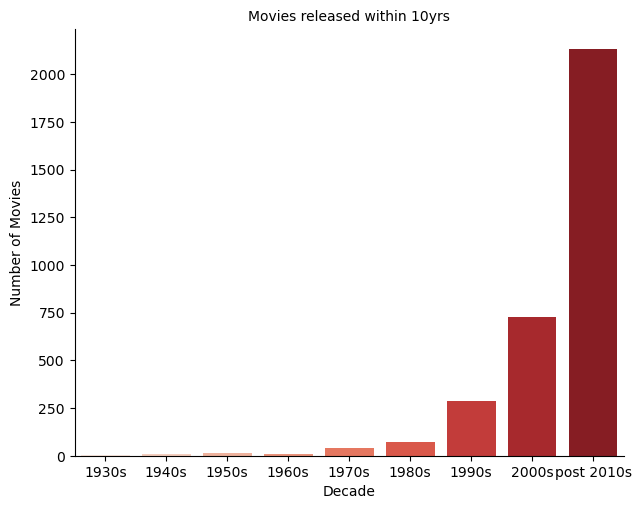

In [236]:
# plot number of movies released per decade
# use seaborn kind = 'count' to do the counting for us
# set aspect to 1.5 to avoid xticks overlapping
sns.catplot(x = 'decade', kind = 'count', palette = 'Reds', data = movies, aspect = 1.3)
plt.ylabel('Number of Movies', fontsize=10)
plt.xlabel('Decade', fontsize=10)
plt.title('Movies released within 10yrs', fontsize = 10)
plt.show()

The graph shows us that the early years when the data was collected there were fewer movies released. This outcome can be inluenced by the industry was in its early stages of starting or maybe the tecnology then was not as advanced as the later years of data collection.

### 2. profit Margin

The purpose of this analysis was to aim on the success of the bussiness. we decided to investigate what profits were made and the mergin one has to expect when entering into this type of busines. for this section we are going to se the 'worldwide_gross' columns.
in this analysis we define profit as follows;
profit = worldwide_gross - production budget
profit mergin = profit/worldwide gross revenue


In [201]:
# Create profit column 
movies['profit'] = movies.apply(lambda x: (x['worldwide_gross']) - (x['production_budget']), axis = 1)

# Get summary statistics for profit
# Use plain formatting to remove scientific notation
movies['profit'].describe().apply(lambda x: format(x, 'f'))

count           3294.000000
mean        62166725.623558
std        167028667.777050
min      -2572483648.000000
25%         -2642093.250000
50%          7702573.500000
75%         59240813.000000
max       1748134200.000000
Name: profit, dtype: object

In [208]:
# Create profit or loss column
movies['profitorloss'] = movies['profit'].map(lambda x : 'Profit' if x >=0 else 'Loss')


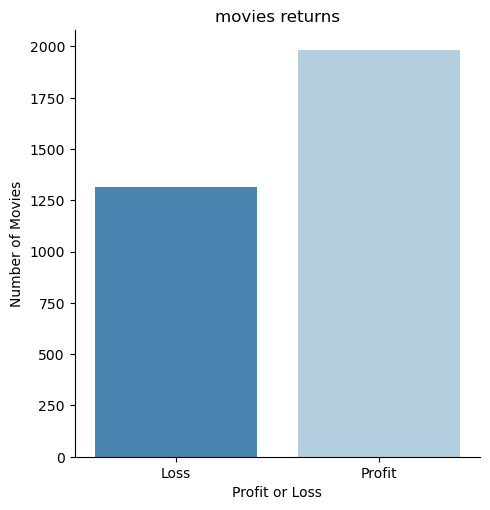

In [229]:
# Plot profit vs loss movie count
sns.catplot(x = 'profitorloss', kind = 'count', palette = 'Blues_r', data = movies)
plt.xlabel('Profit or Loss')
plt.ylabel('Number of Movies')
plt.title('movies returns')
plt.show()

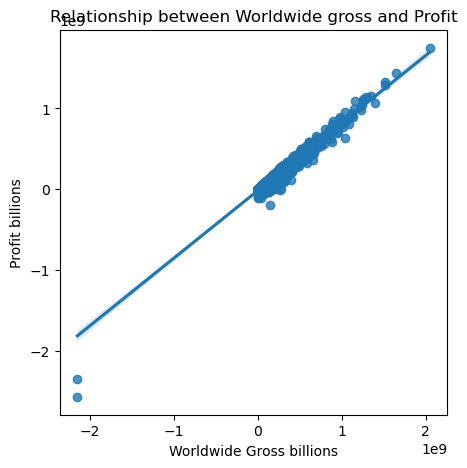

In [237]:
# Plot relationship between profit and worldwide gross
plt.figure(figsize = (5,5))
sns.regplot(x = 'worldwide_gross', y = 'profit', data = movies)
plt.title('Relationship between Worldwide gross and Profit')
plt.xlabel('Worldwide Gross billions')
plt.ylabel('Profit billions')
plt.show()

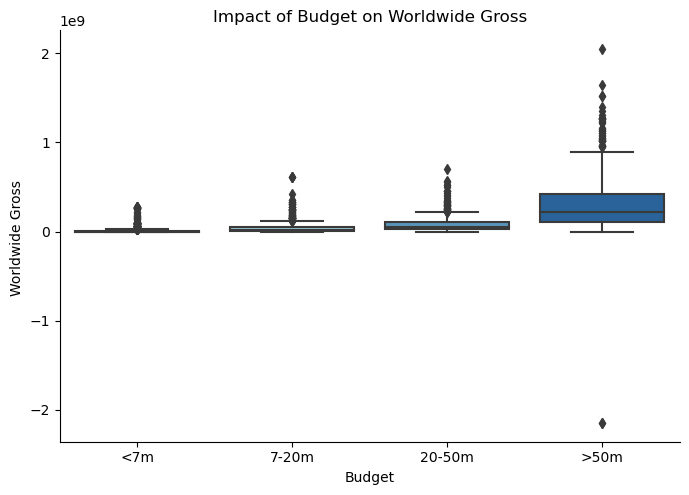

In [238]:
# Boxplot of Bugdet Range
sns.catplot(x = 'budget_range', y = 'worldwide_gross', aspect = 1.4, kind = 'box', 
            palette="Blues", data = movies)
plt.title('Impact of Budget on Worldwide Gross')
plt.xlabel('Budget')
plt.ylabel('Worldwide Gross ')
plt.show()

The two variables look to be highly correlated. When we speak of top grossing films, we can therefore assumes we are also speaking of top profitale films.
we can also see that there was more profit made than the loss.
Therefore the business had a postive impact.,which is highly commendable.

### impact on Budget

we have to investigate what kind of budget is required to mke the shop running. What are the capital required to start a bisiness.
The budget data is difficult to obtain and unreliable as studios try to keep this information hidden and or use accounting tactis to manipulate the figures.
Despite all this we try to answer; is budget a  indicator of top performance and what production budget should the company allocate per movie.

In [212]:
# Preview relevant columns
movies[['movie', 'production_budget']]

,movie,production_budget
0,Avatar,425000000
1,Pirates of the Caribbean: On Stranger Tides,410600000
2,Dark Phoenix,350000000
3,Avengers: Age of Ultron,330600000
4,Avengers: Infinity War,300000000
...,...,...
3289,Clean,10000
3290,Cure,10000
3291,Newlyweds,9000
3292,Red 11,7000


In [213]:
# Describe production budget
# Use plain formatting to remove scientific notation
movies['production_budget'].describe().apply(lambda x: format(x, 'f'))

count         3294.000000
mean      33439408.049787
std       46446883.006308
min           1400.000000
25%        4525000.000000
50%       16000000.000000
75%       40000000.000000
max      425000000.000000
Name: production_budget, dtype: object

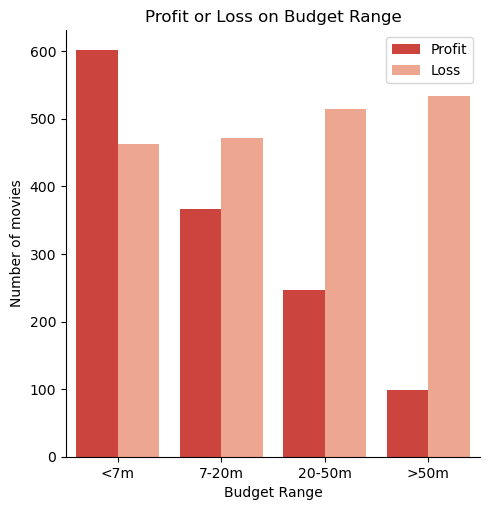

In [240]:
sns.catplot ( x = 'budget_range', kind = 'count', hue = 'profitorloss', palette = 'Reds_r', data = movies, legend = False)
plt.title('Profit or Loss on Budget Range')
plt.xlabel('Budget Range')
plt.ylabel ('Number of movies')
plt.legend(loc='best', labels=['Profit', 'Loss'])
plt.show()

Based on the data, spending more money on movie does not equate to higher worlswide gross.
we recommmend a budget of around 50 million and there was also need to perform further analysis in order to decide where the budget should be allocated.

### movie length

Investigated the movie lenths using the 'runtime_minutes'. we will focus on recent movies(post 2010) and finally top 100 grossing movies post 2010. This is to investgate if runtime is key indicator of performance and what should the company aim at

In [215]:
# Preview relevant columns
movies[['movie', 'runtime_minutes']]

,movie,runtime_minutes
0,Avatar,93.0
1,Pirates of the Caribbean: On Stranger Tides,136.0
2,Dark Phoenix,113.0
3,Avengers: Age of Ultron,141.0
4,Avengers: Infinity War,149.0
...,...,...
3289,Clean,70.0
3290,Cure,93.0
3291,Newlyweds,95.0
3292,Red 11,77.0


In [223]:
# Get statistics for runtime for movies
movies['runtime_minutes'].describe()

count    3294.000000
mean       97.281421
std        27.527675
min         1.000000
25%        87.000000
50%        98.000000
75%       112.000000
max       360.000000
Name: runtime_minutes, dtype: float64

##### recomendations

we first descover that the average runtime for movie is 100 minutes. in the post 2010 the avarage length was between 120 and 2hours. we can see that as years progress the length of movies increased. It is therefore recommmended for Microsoft to take into consideration the length of movies they will be producing.

## conclusions

1. profit can be seen as a worldwide gross less production budget but note this is simplified approach as does not account for revenue stream and costs.
2. profit margin for top 100 grossing movies post 2010 is around 80%
3. strong correlation between budget and profit margin.
4. top movies are longer between 120 minutes.


## Future work

1. Further financial analysis by allocate the production budgets
2. Analysis of additional revenue streamse
3. A reconciliation of financial data, reviewing other reported sources to strenghten the reliability of the data.